In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
#read the csv file from source website and parse the fecha_vigencia (timestamp)
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M")
df = pd.read_csv('http://datos.energia.gob.ar/dataset/1c181390-5045-475e-94dc-410429be4b17/resource/f8dda0d5-2a9f-4d34-b79b-4e63de3995df/download/precios-historicos.csv',
                 parse_dates=['fecha_vigencia'],
                date_parser=custom_date_parser).dropna()
#show dataframe info
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1871960 entries, 0 to 1872311
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   idempresa         int64  
 1   empresa           object 
 2   direccion         object 
 3   localidad         object 
 4   provincia         object 
 5   idproducto        int64  
 6   producto          object 
 7   idtipohorario     int64  
 8   tipohorario       object 
 9   precio            float64
 10  fecha_vigencia    object 
 11  idempresabandera  int64  
 12  empresabandera    object 
 13  latitud           float64
 14  longitud          float64
 15  geojson           object 
dtypes: float64(3), int64(4), object(9)
memory usage: 242.8+ MB


In [180]:
# get the first 20 rows and check them out
df.head(20)

,idempresa,empresa,direccion,localidad,provincia,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,172.50,2022-10-01 10:23:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,3,Nocturno,172.50,2022-10-01 10:23:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,91.20,2021-06-03 13:25:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
3,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,3,Nocturno,91.20,2021-06-03 13:25:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
4,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,175.60,2022-09-05 17:29:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
5,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,3,Nocturno,175.60,2022-09-05 17:29:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
6,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,165.80,2022-09-13 14:16:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
7,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,3,Nocturno,165.80,2022-09-13 14:16:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
8,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,156.80,2022-09-13 14:17:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
9,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,3,Nocturno,156.80,2022-09-13 14:17:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."


In [181]:
#get missing values
df.isnull().sum()/df.count()*100

idempresa           0.0
empresa             0.0
direccion           0.0
localidad           0.0
provincia           0.0
idproducto          0.0
producto            0.0
idtipohorario       0.0
tipohorario         0.0
precio              0.0
fecha_vigencia      0.0
idempresabandera    0.0
empresabandera      0.0
latitud             0.0
longitud            0.0
geojson             0.0
dtype: float64

In [182]:
#see which columns have what types
df.dtypes

idempresa             int64
empresa              object
direccion            object
localidad            object
provincia            object
idproducto            int64
producto             object
idtipohorario         int64
tipohorario          object
precio              float64
fecha_vigencia       object
idempresabandera      int64
empresabandera       object
latitud             float64
longitud            float64
geojson              object
dtype: object

In [183]:
#count how many fuel types exist in the "productos" column
df.value_counts('producto')

producto
Gas Oil Grado 2                     447309
Nafta (súper) entre 92 y 95 Ron     445135
Gas Oil Grado 3                     443802
Nafta (premium) de más de 95 Ron    435044
GNC                                 100670
dtype: int64

In [184]:
#count how many companies exist in the "empresas" column
df.value_counts('empresa')

empresa
AUTOMOVIL CLUB ARGENTINO                       61520
OPEESA                                         38937
PAN AMERICAN ENERGY LLC, SUCURSAL ARGENTINA    33900
OPESSA                                         24623
DEHEZA S.A.I.C.F.I.                             9432
                                               ...  
COC COMBUSTIBLES S.A.                              2
PEDRO RICARDO MANZUR                               2
GUILLERMO FAUSTO MALDONADO S.A.                    2
I.C.FERRAROTTI Y CIA S.A.                          2
LA NONNA LUISA                                     2
Length: 3971, dtype: int64

In [185]:
#count how many cities (localidad) 
df.value_counts('localidad')

localidad
CAPITAL FEDERAL    86652
CORDOBA            78278
ROSARIO            48525
MAR DEL PLATA      31518
LA PLATA           20678
                   ...  
GAONA                  4
SANFORD                4
MARULL                 4
VILLADA                2
PAREDITAS              2
Length: 1113, dtype: int64

In [204]:
df.value_counts('fecha_vigencia')

fecha_vigencia
2022-03-14 00:00:00    12972
2019-12-01 00:00:00    12971
2019-11-01 00:00:00    12844
2019-09-19 00:00:00    12706
2019-11-14 00:00:00    12644
                       ...  
2018-12-12 19:48:00        1
2022-11-24 13:08:00        1
2022-10-01 07:57:00        1
2017-05-12 22:00:00        1
2018-01-14 22:11:00        1
Length: 202493, dtype: int64

In [187]:
#count how many provincies
df.value_counts('provincia')

provincia
BUENOS AIRES           702272
CORDOBA                229700
SANTA FE               192807
ENTRE RIOS              88558
CAPITAL FEDERAL         86652
MENDOZA                 73287
RIO NEGRO               46244
MISIONES                44374
TUCUMAN                 42001
CHACO                   37196
CORRIENTES              37056
SANTIAGO DEL ESTERO     35304
SALTA                   33360
CHUBUT                  32489
LA PAMPA                31950
NEUQUEN                 27484
SAN LUIS                26149
SAN JUAN                24994
JUJUY                   18625
SANTA CRUZ              15716
CATAMARCA               13521
FORMOSA                 13403
LA RIOJA                13355
TIERRA DEL FUEGO         5463
dtype: int64

In [208]:
#check the timestamp min and max range
df["fecha_vigencia"].min(), df["fecha_vigencia"].max()

('0001-01-01 00:00:00', '9920-04-21 15:57:00')

In [209]:
# A function to Extract years from the date 
Year=[]
def Extract_year(fecha_vigencia):
    for i in df["fecha_vigencia"]:
        Year.append(i.split("-")[0])
    return Year

df['fecha_vigencia'] = df['fecha_vigencia'].astype(str)

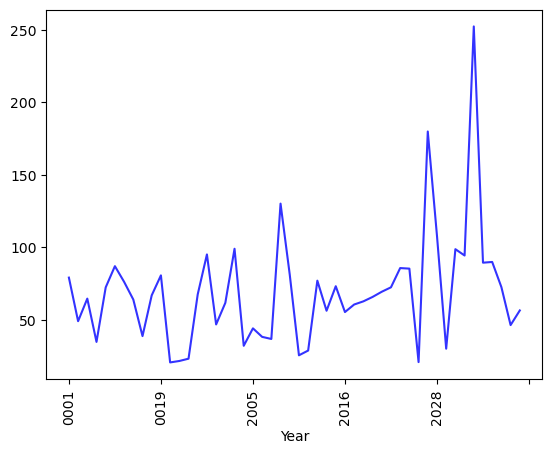

In [210]:
#mean price vs year
df1=pd.DataFrame(Extract_year(df['fecha_vigencia']), columns =['Year'])
df1['precio']=df['precio']
df1.groupby('Year')['precio'].mean().plot(kind='line', color=["blue"], alpha=0.8)
plt.xticks(rotation=90)
plt.show()

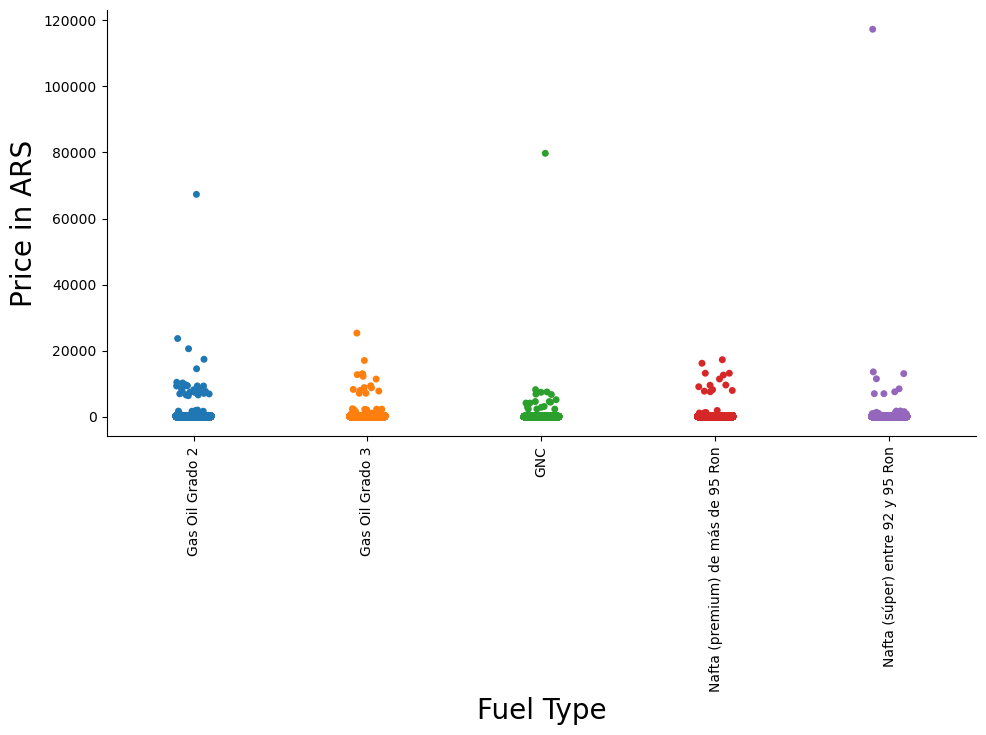

In [212]:
#plot the price range compared to each fuel type
sns.catplot(y="precio", x="producto", data=df, aspect = 2)
plt.xlabel("Fuel Type",fontsize=20)
plt.ylabel("Price in ARS",fontsize=20)
plt.xticks(rotation=90) #names were too long; had to tilt to be readable
plt.show()

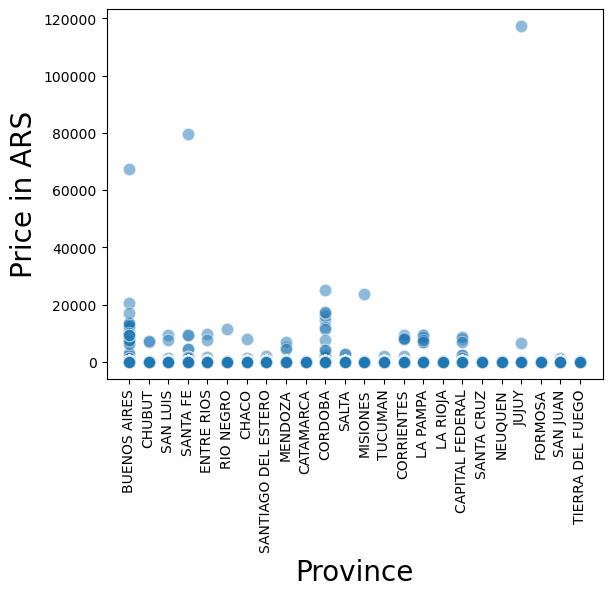

In [213]:
#price vs provinces
sns.scatterplot(y="precio", x="provincia", data=df, alpha=0.5, s=80)
plt.xlabel("Province",fontsize=20)
plt.ylabel("Price in ARS",fontsize=20)
plt.xticks(rotation=90)
plt.show()

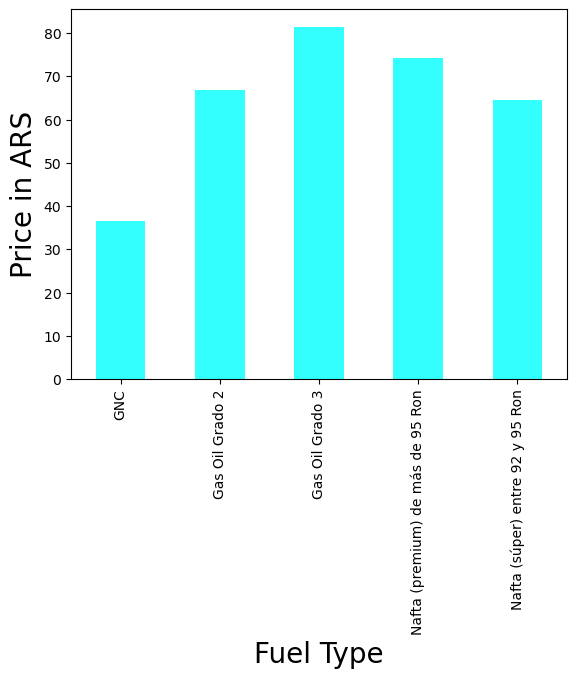

In [214]:
# mean price vs fuel type 
df.groupby(["producto"]).mean()["precio"].plot(kind='bar', color=["cyan"], alpha=0.8)
plt.xlabel("Fuel Type",fontsize=20)
plt.ylabel("Price in ARS",fontsize=20)
plt.xticks(rotation=90)
plt.show()


(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000.]),
 [Text(-250000.0, 0, '2018-07-10 13:36:00'),
  Text(0.0, 0, '2022-10-01 10:23:00'),
  Text(250000.0, 0, '2021-04-17 11:34:00'),
  Text(500000.0, 0, '2017-04-10 12:03:00'),
  Text(750000.0, 0, '2021-12-30 17:00:00'),
  Text(1000000.0, 0, '2022-03-14 11:42:00'),
  Text(1250000.0, 0, '2020-10-16 00:00:00'),
  Text(1500000.0, 0, '2019-06-01 07:00:00'),
  Text(1750000.0, 0, '2021-01-05 00:00:00'),
  Text(2000000.0, 0, '')])

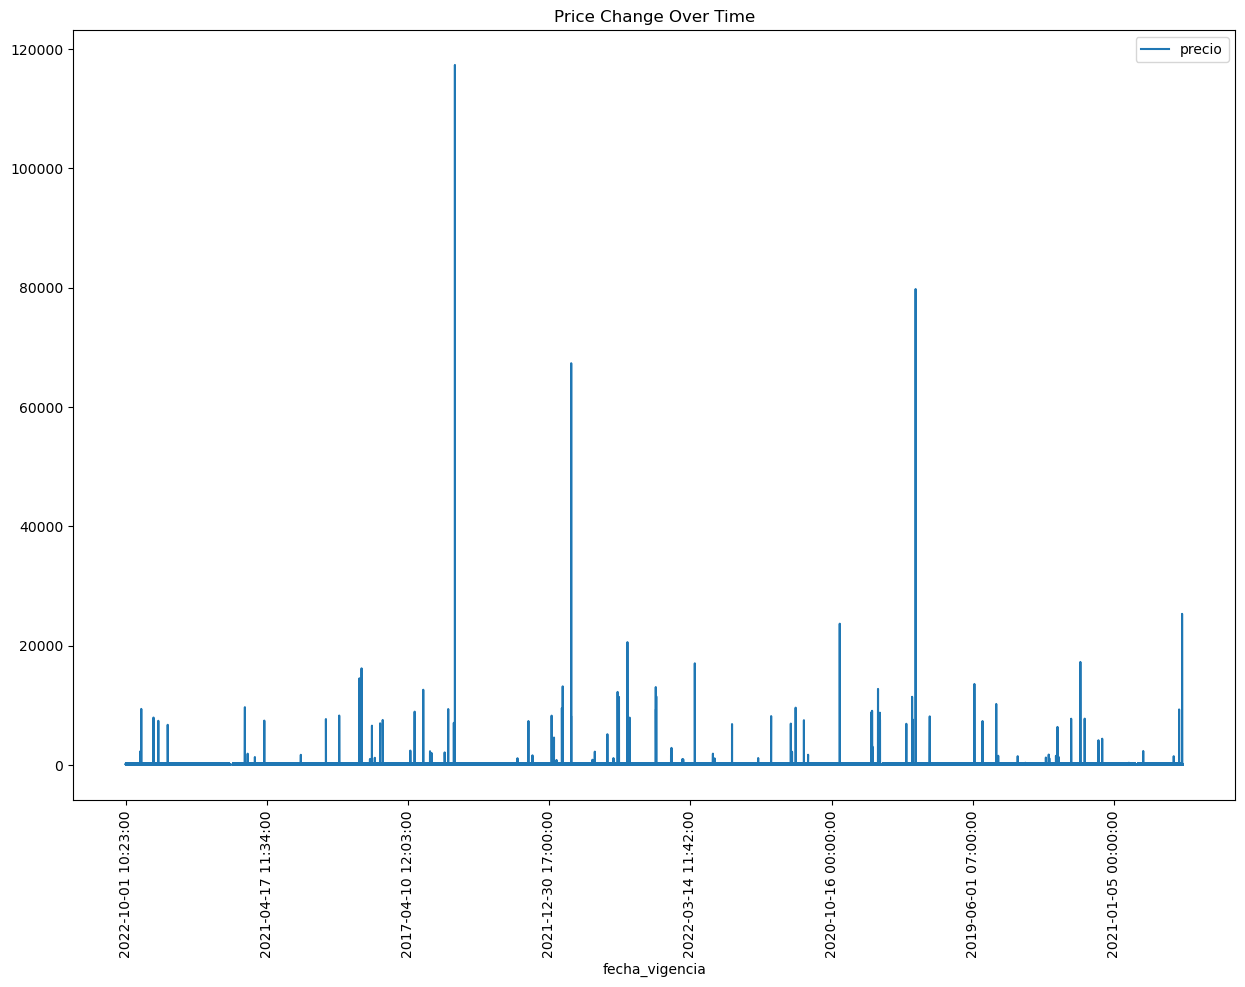

In [257]:
#x axis needs to show ascending order from left to right
df.plot( y = 'precio', x = 'fecha_vigencia', figsize=(15,10), title="Price Change Over Time")
plt.xticks(rotation=90)